In [1]:
import pandas as pd

df = pd.read_csv("D:/Work/VSC/DS Proj/house-prices-advanced-regression-techniques/train.csv")
import pandas as pd

# Load the train and test datasets
train_data = pd.read_csv("D:/Work/VSC/DS Proj/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("D:/Work/VSC/DS Proj/house-prices-advanced-regression-techniques/test.csv")

# Display the first few rows of the train dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Example: Fill missing numerical values with the median
filled_values = train_data.fillna(train_data.median(), inplace=True)
print(f"\nFilled missing numerical values with the median: {filled_values}")

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


TypeError: Cannot convert [['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
 ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... 'Shed' nan nan]
 ['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']
 ['Normal' 'Normal' 'Normal' ... 'Normal' 'Normal' 'Normal']] to numeric

In [3]:
# Separate numeric and categorical columns
numeric_cols = train_data.select_dtypes(include=['number']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Fill missing numeric values with the median
train_data[numeric_cols] = train_data[numeric_cols].apply(lambda col: col.fillna(col.median()))

# Fill missing categorical values with the mode (most frequent value)
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Check if any missing values remain
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])
print(train_data.isnull().sum())


Series([], dtype: int64)
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

# Example: Scale numeric features
scaler = StandardScaler()

numeric_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF']  # Example features
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])

# Example: Create a new feature that is a product of two features
train_data['GrLivArea_OverallQual'] = train_data['GrLivArea'] * train_data['OverallQual']

In [6]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = train_data.drop(columns=['SalePrice'])  # Features
y = train_data['SalePrice']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assume X_train is your training set
# Use one-hot encoding for categorical variables 'RL'
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Ensure X_test also uses the same encoding
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the columns to ensure they match between train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now you can train the model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 746486.0362348517
MAE: 739048.1426583905
R²: -71.64898352973346


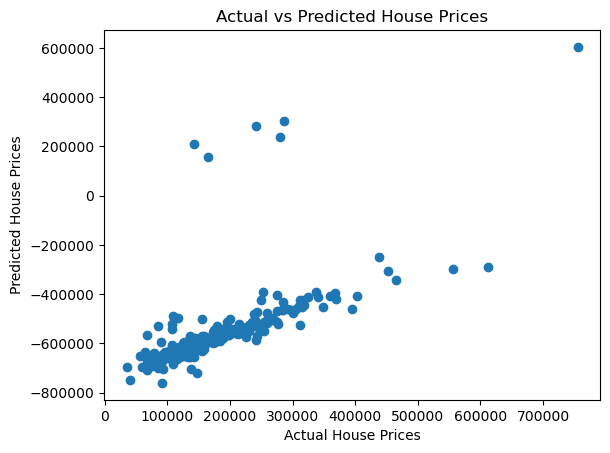

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()